# **PREDICTING THE PRICES OF USED CARS**

## **Import the relevant libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## Load the data

In [2]:
data = pd.read_csv(r'C:\Users\HP\Documents\Python Projects\1.04. Real life example.csv')
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

In [4]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data_no_mv = data.dropna(axis = 0)
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFS and Dealing with outliers

<Axes: xlabel='Price', ylabel='Density'>

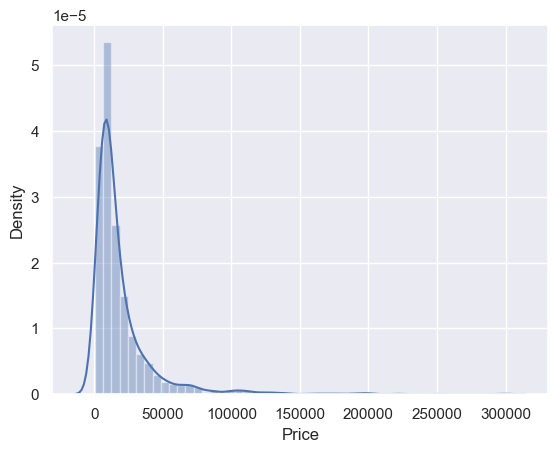

In [6]:
sns.distplot(data_no_mv['Price'])

In [7]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price'] < q]
data_1.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


<Axes: xlabel='Price', ylabel='Density'>

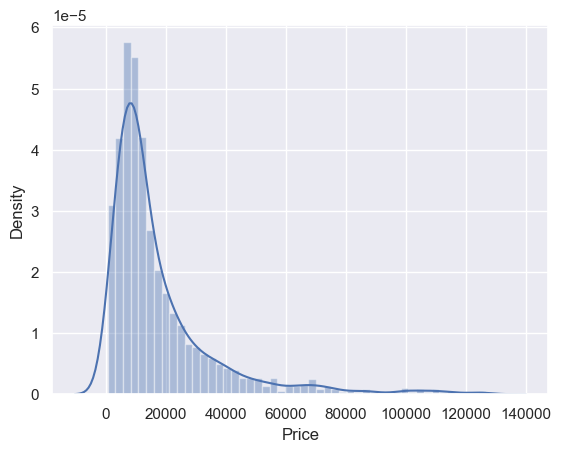

In [8]:
sns.distplot(data_1['Price'])

<Axes: xlabel='Mileage', ylabel='Density'>

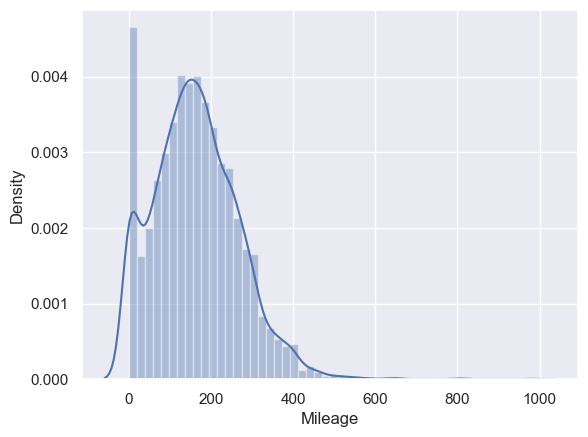

In [9]:
sns.distplot(data_no_mv['Mileage'])

In [10]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage'] < q]
data_2.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000,3944
unique,7,NaN,6,NaN,NaN,4,2,NaN,299
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN,185
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959,NaN
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


<Axes: xlabel='Mileage', ylabel='Density'>

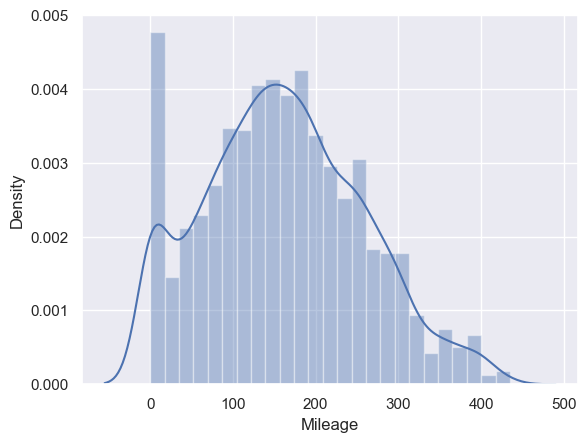

In [11]:
sns.distplot(data_2['Mileage'])

<Axes: xlabel='EngineV', ylabel='Density'>

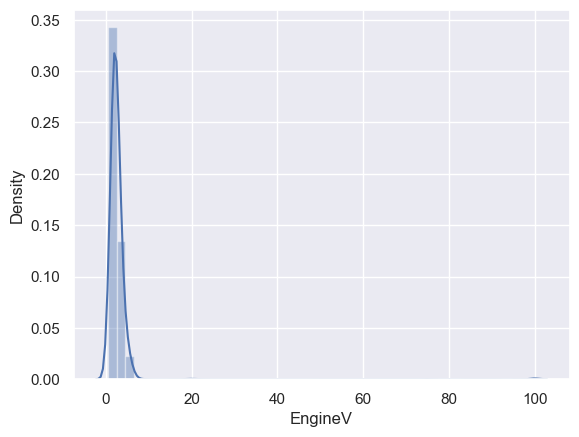

In [12]:
sns.distplot(data_2['EngineV'])

In [13]:
data_3 = data_2[data_2['EngineV'] < 6.5]
data_3.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000,3921
unique,7,NaN,6,NaN,NaN,4,2,NaN,298
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN,185
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019,NaN
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000,NaN


<Axes: xlabel='EngineV', ylabel='Density'>

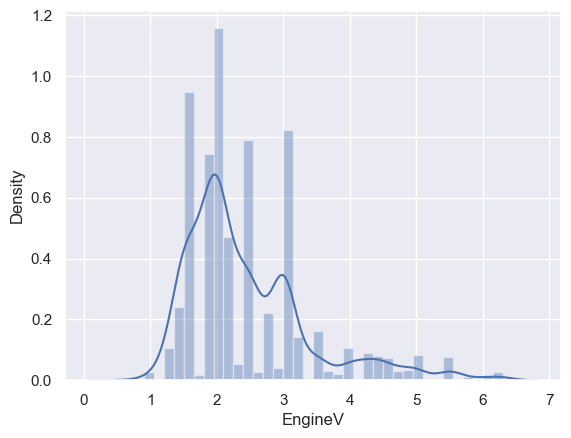

In [14]:
sns.distplot(data_3['EngineV'])

<Axes: xlabel='Year', ylabel='Density'>

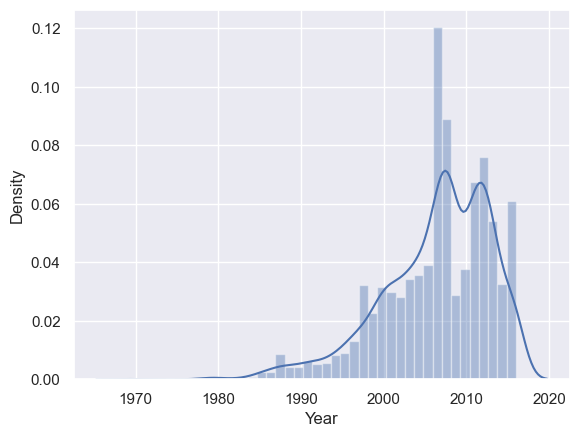

In [15]:
sns.distplot(data_3['Year'])

In [16]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year'] > q]
data_4.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


<Axes: xlabel='Year', ylabel='Density'>

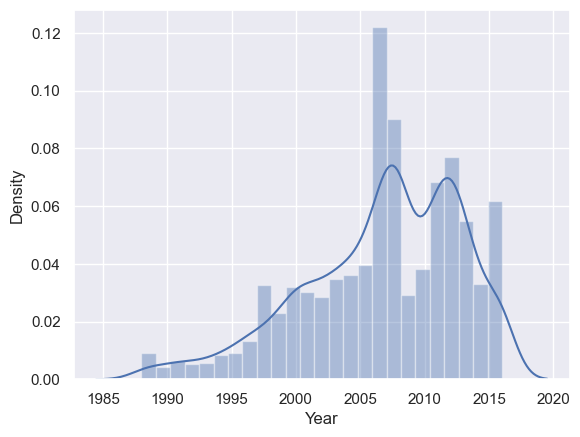

In [17]:
sns.distplot(data_4['Year'])

In [18]:
data_cleaned = data_4.reset_index(drop = True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter)
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535


## Checking the OLS assumptions

### Linearity

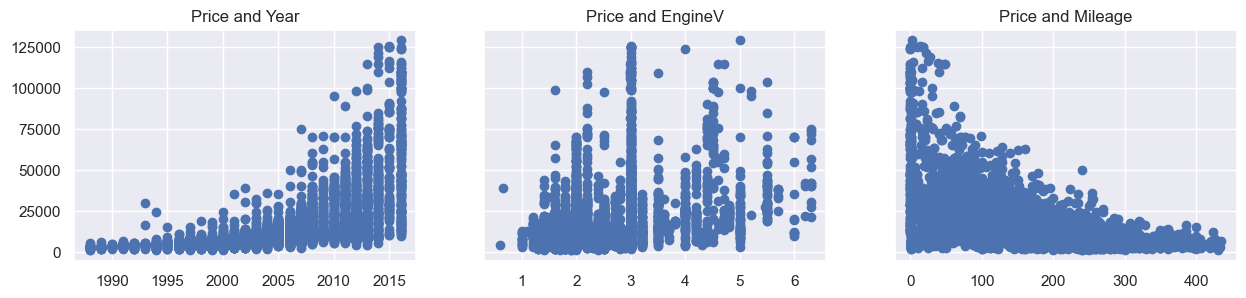

In [19]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

### Relaxing the assumptions

In [20]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4,9.814656
...,...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,T5 (Transporter),9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,Corolla,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535,8.779557


### Replotting to check the linearity

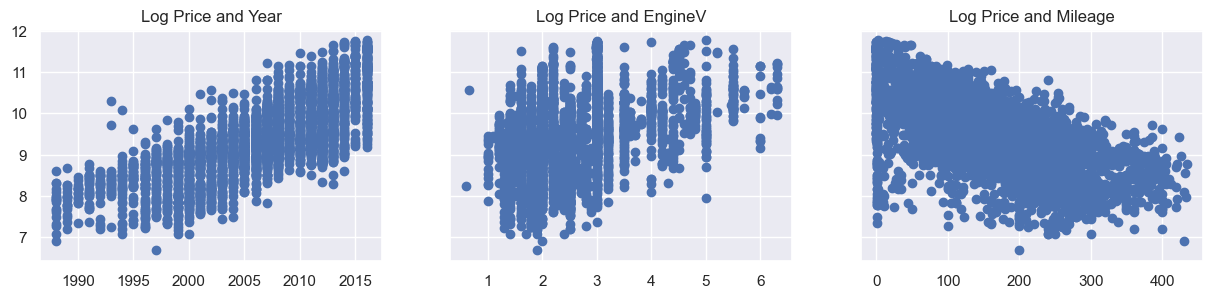

In [21]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')
plt.show()

In [22]:
data_cleaned = data_cleaned.drop(columns = ['Price'])

### Multicollinearity

In [23]:
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,7.662068,EngineV
2,10.354854,Year


In [24]:
data_no_multicollinearity = data_cleaned.drop(['Year'], axis = 1)

## Create dummy variables

In [25]:
label_encoder = LabelEncoder()
for columns_to_keep in data_no_multicollinearity.drop(['log_price', 'Mileage', 'EngineV'], axis=1):
    data_no_multicollinearity[columns_to_keep] = label_encoder.fit_transform(data_no_multicollinearity[columns_to_keep])

data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model,log_price
0,1,3,277,2.0,3,1,17,8.342840
1,2,5,427,2.9,0,1,248,8.974618
2,2,3,358,5.0,1,1,222,9.495519
3,0,0,240,4.2,3,1,211,10.043249
4,5,0,120,2.0,3,1,214,9.814656


## Rearranging

In [26]:
data_no_multicollinearity.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model', 'log_price'], dtype=object)

In [27]:
col = ['log_price', 'Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model']

In [28]:
data_preprocessed = data_no_multicollinearity[col]
data_preprocessed.head()

,log_price,Brand,Body,Mileage,EngineV,Engine Type,Registration,Model
0,8.342840,1,3,277,2.0,3,1,17
1,8.974618,2,5,427,2.9,0,1,248
2,9.495519,2,3,358,5.0,1,1,222
3,10.043249,0,0,240,4.2,3,1,211
4,9.814656,5,0,120,2.0,3,1,214


## Linear regression model

In [29]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

## Scaling the data

In [30]:
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

## Training the data

In [31]:
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 42)

## Create the regression

In [32]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

## Feature Selection

### Set the hyperarameters

In [33]:
ridge_params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100], 
        'fit_intercept':[True, False], 
        'solver':['svd', 'cholesky', 'lsqr', 'sparse_cy', 'sag', 'saga'] }

lasso_params = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100], 
        'fit_intercept':[True, False], 
        'copy_X':[True, False] }

### Tuning the hyperparameters for ridge regression

In [34]:
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cy',
                                    'sag', 'saga']})

In [35]:
ridge_cv.best_params_

{'alpha': 0.01, 'fit_intercept': True, 'solver': 'saga'}

In [36]:
ridge_best = Ridge(**ridge_cv.best_params_, random_state=3)
ridge_best = ridge_best.fit(x_train, y_train)

### Tuning the hyperparameters for lasso regression

In [37]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5)
lasso_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [38]:
lasso_cv.best_params_

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True}

### Train the model with best alpha param

In [39]:
lasso_best = Lasso(**lasso_cv.best_params_, random_state=3)
lasso_best = lasso_best.fit(x_train, y_train)

### Explore CV results for ridge and lasso regression

In [40]:
ridge_scores = cross_val_score(estimator = ridge_best, X = x_train, y = y_train, cv=5)
ridge_scores

array([0.68037895, 0.67941965, 0.72038378, 0.74602502, 0.64831214])

In [41]:
ridge_scores.mean()

0.6949039068328796

In [42]:
lasso_scores = cross_val_score(estimator = lasso_best, X = x_train, y = y_train, cv=5)
lasso_scores

array([0.68023463, 0.6792777 , 0.72031088, 0.74599833, 0.64865151])

In [43]:
lasso_scores.mean()

0.6948946112501739

### Evaluate the trained lasso and ridge model 

In [44]:
ridge_mse = mean_squared_error(y_test, ridge_best.predict(x_test))
lasso_mse = mean_squared_error(y_test, lasso_best.predict(x_test))

In [45]:
ridge_mae = mean_absolute_error(y_test, ridge_best.predict(x_test))
lasso_mae = mean_absolute_error(y_test, lasso_best.predict(x_test))

In [46]:
ridge_r2 = r2_score(y_test, ridge_best.predict(x_test))
lasso_r2 = r2_score(y_test, lasso_best.predict(x_test))

In [47]:
print(f'Ridge Regression MSE: {ridge_mse}')
print(f'Lasso Regression MSE: {lasso_mse}')
print(f'Ridge Regression MAE: {ridge_mae}')
print(f'Lasso Regression MAE: {lasso_mae}')
print(f'Ridge Regression R2 Score: {ridge_r2}')
print(f'Lasso Regression R2 Score: {lasso_r2}')

Ridge Regression MSE: 0.26965006116287593
Lasso Regression MSE: 0.26963824373602147
Ridge Regression MAE: 0.3839843961689735
Lasso Regression MAE: 0.3840430033792479
Ridge Regression R2 Score: 0.6728290027388885
Lasso Regression R2 Score: 0.6728433410235243


### Evaluate Feature Importance

In [48]:
def plot_feature_importance(model):
    features = list(inputs.columns)
    feature_importance = pd.Series(model.coef_, index = features)
    feature_importance.plot(kind = 'barh')

    if 'ridge' in str(model).lower():
        plt.title('Feature Importance for Ridge Regression')
    elif 'lasso' in str(model).lower():
        plt.title('Feature Importance for Lasso Regression')
    
    plt.show()

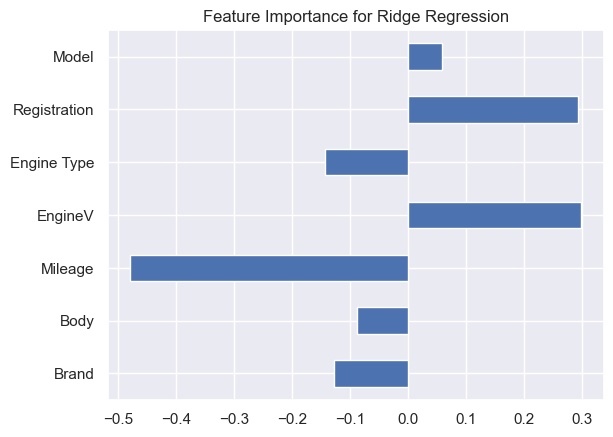

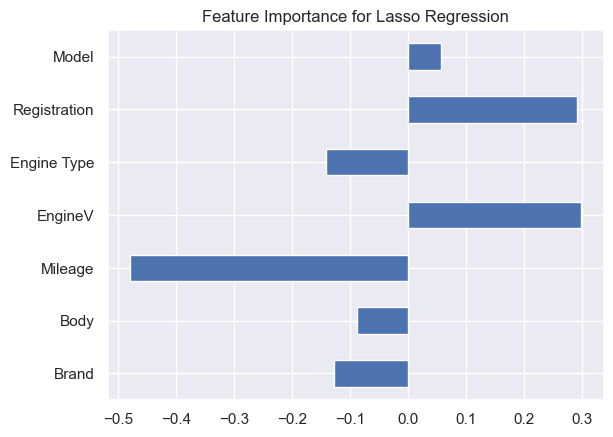

In [49]:
plot_feature_importance(ridge_best)
plot_feature_importance(lasso_best)

In [50]:
coef = lasso_cv.best_estimator_.coef_
coef != 0

array([ True,  True,  True,  True,  True,  True,  True])

### Features considered by the model

In [51]:
selected_columns = inputs.columns.values[coef != 0]
selected_columns

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Model'], dtype=object)

In [52]:
# Checking the outputs of the regression
y_hat = reg.predict(x_train)

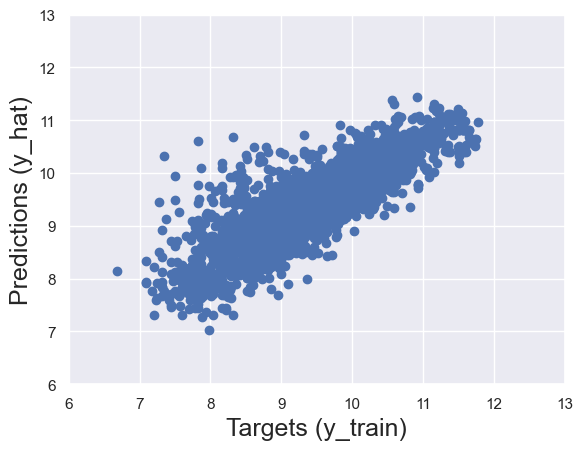

In [53]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size = 18)
plt.ylabel('Predictions (y_hat)', size = 18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

Text(0.5, 1.0, 'Residual Plot')

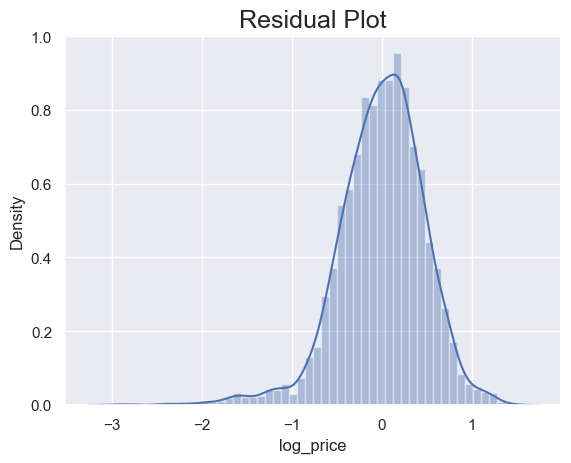

In [54]:
# Checking the residual plot
sns.distplot(y_train - y_hat)
plt.title('Residual Plot', size=18)

## Evaluate the trained model

In [55]:
reg.score(x_train, y_train)

0.6987389405842946

In [56]:
print(f'R2 Score => {r2_score(y_train, y_hat)}')
print(f'MSE Score => {mean_squared_error(y_train, y_hat)}')

R2 Score => 0.6987389405842946
MSE Score => 0.2269597779378845


$R^2_{adj.} = 1-(1-R^2)*\frac{n-1}{n-p-1}$

In [57]:
def adj_r2(x, y):
    r2 = reg.score(x, y)
    n = inputs.shape[0]
    p = inputs.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [58]:
adj_r2(x_train, y_train)

0.6981924706656862

## Finding the weights and bias of the training data

In [59]:
reg.intercept_

9.420622867084276

In [60]:
reg.coef_

array([-0.12856365, -0.08820742, -0.47955795,  0.29877959, -0.14336932,
        0.29297445,  0.05834416])

## Summary table

In [61]:
reg_summary = pd.DataFrame(data = inputs.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Brand,-0.128564
1,Body,-0.088207
2,Mileage,-0.479558
3,EngineV,0.298780
4,Engine Type,-0.143369
5,Registration,0.292974
6,Model,0.058344


## Testing the model

In [62]:
y_hat_test = reg.predict(x_test)

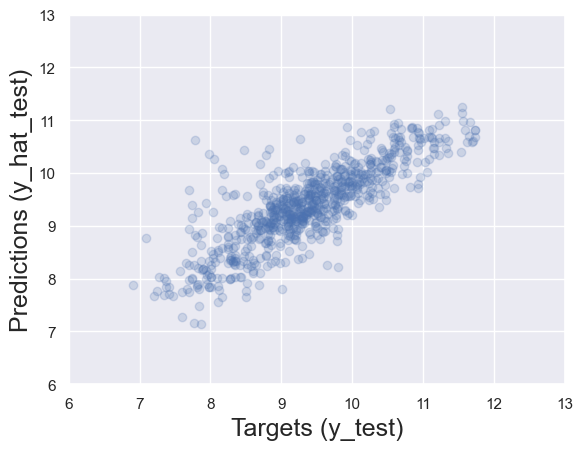

In [63]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6, 13)
plt.ylim(6, 13)
plt.show()

In [64]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns = ['Predictions'])
df_pf.head()

,Predictions
0,41278.611581
1,11288.354107
2,6496.650512
3,13240.306083
4,6603.206872


In [65]:
df_pf['Targets'] = np.exp(y_test.reset_index(drop = True))
df_pf

,Predictions,Targets
0,41278.611581,21300.0
1,11288.354107,8900.0
2,6496.650512,3250.0
3,13240.306083,12000.0
4,6603.206872,5400.0
...,...,...
769,4628.025786,4200.0
770,15897.152390,8800.0
771,4994.337931,4850.0
772,19123.856531,27000.0


In [66]:
df_pf['Residual'] = df_pf['Targets'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Targets']*100)
df_pf

,Predictions,Targets,Residual,Difference%
0,41278.611581,21300.0,-19978.611581,93.796299
1,11288.354107,8900.0,-2388.354107,26.835439
2,6496.650512,3250.0,-3246.650512,99.896939
3,13240.306083,12000.0,-1240.306083,10.335884
4,6603.206872,5400.0,-1203.206872,22.281609
...,...,...,...,...
769,4628.025786,4200.0,-428.025786,10.191090
770,15897.152390,8800.0,-7097.152390,80.649459
771,4994.337931,4850.0,-144.337931,2.976040
772,19123.856531,27000.0,7876.143469,29.170902


In [67]:
df_pf.describe()

,Predictions,Targets,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15691.357025,17799.988992,2108.631967,48.292131
std,12184.048843,19723.434542,12589.739519,96.478329
min,1261.181327,999.000000,-39054.681218,0.083041
25%,7704.556075,6700.000000,-2733.230522,13.672547
50%,12221.003750,11050.000000,-30.414778,29.122764
75%,20067.491205,20475.000000,3874.494470,50.500450
max,76798.471422,125000.000000,81608.123340,1627.278384


In [68]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by = ['Difference%'])
df_pf.reset_index(drop = True)

,Predictions,Targets,Residual,Difference%
0,41278.61,21300.00,-19978.61,93.80
1,11288.35,8900.00,-2388.35,26.84
2,6496.65,3250.00,-3246.65,99.90
3,13240.31,12000.00,-1240.31,10.34
4,6603.21,5400.00,-1203.21,22.28
5,12233.80,15300.00,3066.20,20.04
6,14743.56,4200.00,-10543.56,251.04
7,10061.98,9200.00,-861.98,9.37
8,34064.28,55500.00,21435.72,38.62
9,76798.47,104000.00,27201.53,26.16
